In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

# View the data

In [5]:
data_df = pd.read_csv("cod")

In [29]:
data_df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [30]:
data_df.dtypes

name               object
wins                int64
kills               int64
kdRatio           float64
killstreak          int64
level               int64
losses              int64
prestige            int64
hits                int64
timePlayed          int64
headshots           int64
averageTime       float64
gamesPlayed         int64
assists             int64
misses              int64
xp                  int64
scorePerMinute    float64
shots               int64
deaths              int64
dtype: object

In [31]:
# Check nulls
data_df.isna().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [32]:
data_df["prestige"].value_counts()

0      609
110    365
111    219
2       22
1       22
      ... 
49       1
47       1
43       1
116      1
42       1
Name: prestige, Length: 85, dtype: int64

# EDA

In [139]:
# from shots get how many missed, hit, headshot
# shots we can get accuracy from it
# range the levels
# top 10 players metric unkown
# time played vs skill
# headshot 
# On avegae how many hours do you need to become decent in COD


In [147]:
# reformat the name field
data_df["name"] = data_df["name"].map(lambda x: x.split('#')[0])

In [148]:
data = data_df[(data_df["shots"] > data_df["kills"]) & (data_df["shots"] > 5)]

In [149]:
# <2,000 ## newbie
# <4,000 ## beginner
# <6,000 ## Intermediate
# <8,000 ## Advanced
# >10,000 ## professional
def player_class(x):
    if x < 2000:
        return "Newbie"
    if x < 4000:
        return "Beginner"
    if x < 6000:
        return "Intermediate"
    if x < 8000:
        return "Advanced"
    else:
        return("Professional")

In [ ]:
#Creating new columns to shots persentage:

data['persent_shots_hit'] = data.hits/data.shots*100
data['persent_shots_missed'] = data.misses/data.shots*100
data['persent_headshots'] = data.headshots/data.shots*100

In [ ]:
#Creating new columns 

data["aim_accuracy"] = data["hits"] / data["shots"]
data["prestige"] = data["prestige"].map(lambda x: x*100) # each 100 levels is a prestige
data["level"] = data["level"] + data["prestige"]
data["class"] = data["level"].map(player_class)

In [152]:
# to find the mean of shost types for all players acordening to class
data_shots = data.groupby(["class"]).mean()[["persent_shots_missed","persent_headshots","persent_shots_hit"]]
data_shots

,persent_shots_missed,persent_headshots,persent_shots_hit
class,,,
Advanced,82.141712,1.404795,17.858288
Beginner,81.143503,1.580048,18.856497
Intermediate,80.891733,1.165151,19.108267
Newbie,83.926981,1.043753,16.073019
Professional,82.237496,1.971618,17.763565


In [153]:
# Get top 10 skilled players
top_10_players = data.sort_values(["kills"])[-10:]
top_10_players

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,persent_shots_hit,persent_shots_missed,persent_headshots,aim_accuracy,class
505,xXnutmaster69Xx,1210,44067,0.902661,41,11377,17,11100,132368,3782,7709,3.622605,1044,9598,457669,8216452,165.434532,590037,48819,22.433847,77.566153,1.306528,0.224338,Professional
1021,kingslab,1386,45125,0.985305,17,11364,9,11100,155702,3020,5426,3.348115,902,9534,733107,7669211,239.498344,888809,45798,17.518049,82.481951,0.610480,0.175180,Professional
1551,JermWormy,1173,45764,1.078627,20,11389,14,11100,128437,3272,7146,2.655844,1232,7133,409748,8740718,214.819438,538185,42428,23.864842,76.135158,1.327796,0.238648,Professional
1526,culioncisimo74,1846,50302,0.842481,14,11418,12,11100,179357,5528,6297,3.314149,1668,8242,697394,9978904,185.047902,876751,59707,20.457005,79.542995,0.718220,0.204570,Professional
1263,mike_hawks_long,1877,50600,0.891300,21,11354,37,11100,83613,3827,7819,2.486680,1539,7371,435537,7205979,206.530442,519150,56771,16.105750,83.894250,1.506116,0.161057,Professional
1313,Killopen,1746,51595,0.920238,19,11535,10,11100,145596,6231,9673,5.227349,1192,10472,600193,14970539,110.934232,745789,56067,19.522412,80.477588,1.297016,0.195224,Professional
1095,Fernoo,1158,55368,1.139353,32,4893,26,4600,209851,3075,7716,1.843525,1668,14531,715770,8896196,250.468488,925621,48596,22.671374,77.328626,0.833603,0.226714,Intermediate
1286,JOMPLE,1930,57116,0.925840,18,11400,9,11100,158128,4181,8838,2.798527,1494,9650,660264,9218954,243.988472,818392,61691,19.321792,80.678208,1.079923,0.193218,Professional
235,LCD,3519,59563,0.877372,19,11397,20,11100,200845,7479,7638,1.997063,3745,12300,965775,9062157,330.616205,1166620,67888,17.215974,82.784026,0.654712,0.172160,Professional
1120,COPA,1741,66935,1.417244,28,11444,16,11100,135447,4192,11204,2.809651,1492,10441,652233,11080512,203.784160,787680,47229,17.195689,82.804311,1.422405,0.171957,Professional


In [ ]:
data_df.insert(19, 'preferredWeapon', 'other')

In [154]:
## Code Lines to determine the weapons 
data_df.loc[(data_df["kills" ] > 0) & (data_df["hits"] == 0) & (data_df["headshots"] == 0) & (data_df["shots"] == 0), 'preferredWeapon'] = "knife"
data_df.loc[((data_df["headshots" ] > data_df["shots"]) & (data_df["shots"] == 0)), 'preferredWeapon'] = "sniper" 
data_df.loc[(data_df["timePlayed" ] < data_df["timePlayed"].mean()) & (data_df["shots"] > data_df["shots"].mean()),'preferredWeapon'] = "Machine gun" 

x = data_df.groupby('preferredWeapon').size()
x


preferredWeapon
Machine gun      49
knife            79
other          1180
sniper          250
dtype: int64

# The plots

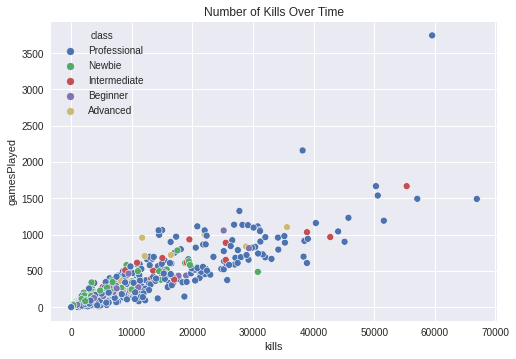

In [173]:
# Plot the number of kills vs games played
sns.scatterplot(
    x="kills", 
    y="gamesPlayed",
    hue="class",
    data=data)
plt.title('Number of Kills Over Time')
plt.show()

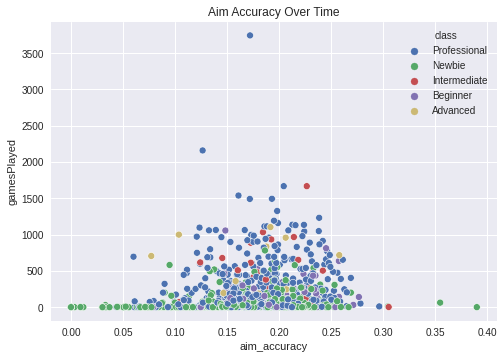

In [174]:
# Plot the aim accuracy vs games played
sns.scatterplot(
    x="aim_accuracy", 
    y="gamesPlayed",
    hue="class",
    data=data)
plt.title('Aim Accuracy Over Time')
plt.show()

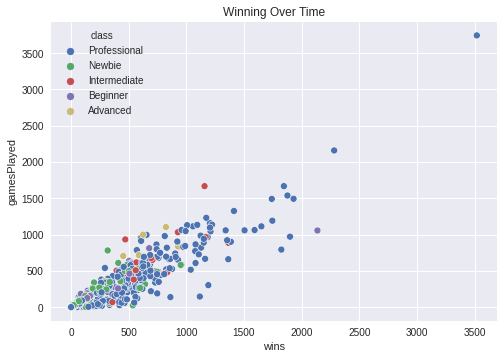

In [175]:
# Plot the wins vs games played
sns.scatterplot(
    x="wins", 
    y="gamesPlayed",
    hue="class",
    data=data)

plt.title('Winning Over Time')
plt.show()

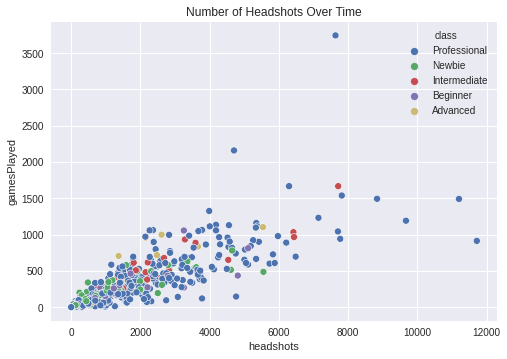

In [176]:
# Plot the headshots vs games played
sns.scatterplot(
    x="headshots", 
    y="gamesPlayed",
    hue="class",
    data=data)
plt.title('Number of Headshots Over Time')
plt.show()

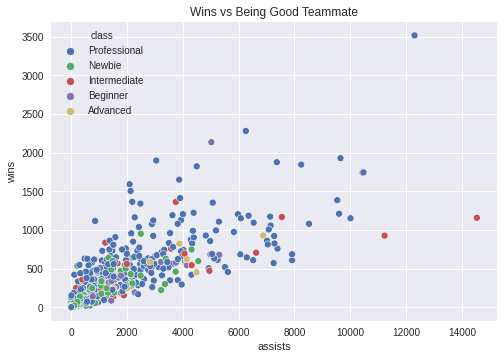

In [177]:
# Plot assisting your team vs wins
sns.scatterplot(
    x="assists", 
    y="wins",
    hue="class",
    data=data)
plt.title('Wins vs Being Good Teammate')
plt.show()

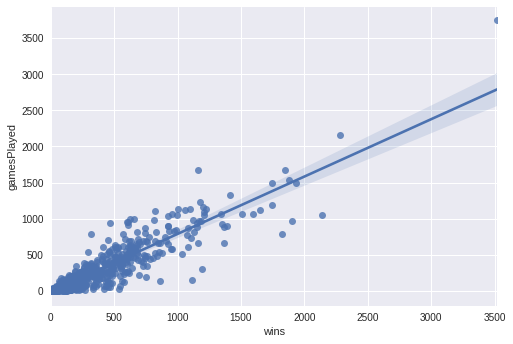

In [178]:
# Plot a fitting line for the data
sns.regplot(
    x="wins", 
    y="gamesPlayed",
    data=data);

In [ ]:
print("You need to play at least {} Hours to be of Newbie level in COD".format(int(data_df[data_df["class"] == "Newbie"]["timePlayed"].mean())))
print("You need to play at least {} Hours to be of Beginner level in COD".format(int(data_df[data_df["class"] == "Beginner"]["timePlayed"].mean())))
print("You need to play at least {} Hours to be of Intermediate level in COD".format(int(data_df[data_df["class"] == "Intermediate"]["timePlayed"].mean())))
print("You need to play at least {} Hours to be of Advanced level in COD".format(int(data_df[data_df["class"] == "Advanced"]["timePlayed"].mean())))
print("You need to play at least {} Hours to be of Professional level in COD".format(int(data_df[data_df["class"] == "Professional"]["timePlayed"].mean())))

You need to play at least 154 Hours to be of Newbie level in COD
You need to play at least 458 Hours to be of Beginner level in COD
You need to play at least 919 Hours to be of Intermediate level in COD
You need to play at least 1002 Hours to be of Advanced level in COD
You need to play at least 1147 Hours to be of Professional level in COD


Text(0.5, 1.0, 'Relationship Between Number of Kills and Deaths')

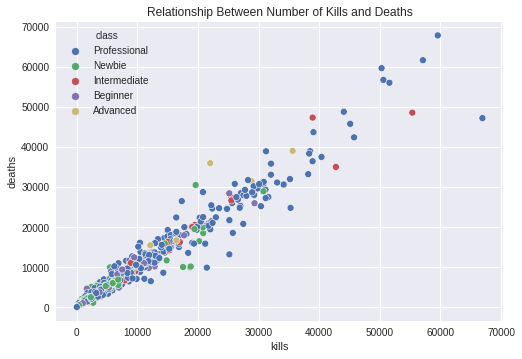

In [179]:
### when num of kills increases num of deaths increases as well. 

sns.scatterplot(
    x="kills", 
    y="deaths",
    hue="class",
    data=data)
plt.title("Relationship Between Number of Kills and Deaths")

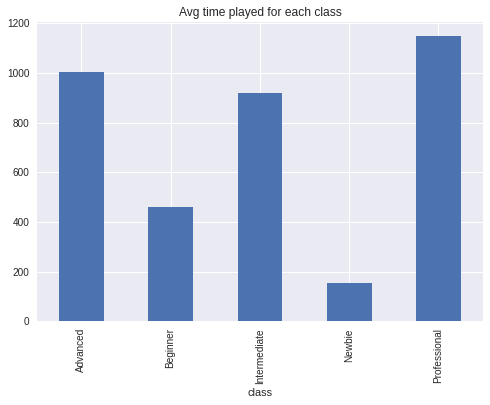

In [180]:
data.groupby("class").mean()["timePlayed"].plot(kind="bar", title="Avg time played for each class")

In [182]:
cleaned_top_10_players = top_10_players.set_index("name")

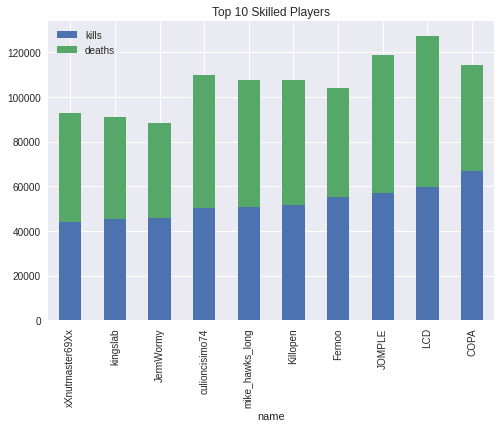

In [183]:
# Plot the number of kills & deaths of each player
cleaned_top_10_players[["kills", "deaths"]].plot(kind="bar", stacked=True, title="Top 10 Skilled Players")

Text(0.5, 1.0, 'Shots For Each Class')

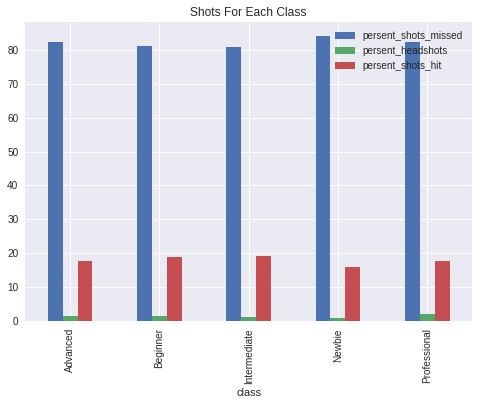

In [184]:
data_shots.plot(kind="bar")
plt.title("Shots For Each Class") 


In [185]:
# Pie chart for classes
data2 = data["class"].value_counts()
data2

Professional    432
Newbie          380
Beginner         64
Intermediate     37
Advanced         16
Name: class, dtype: int64

In [186]:
# level:        MIN 1 MAX 435
# prestige:     MIN 0 MAX 117

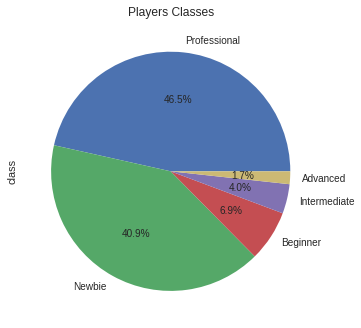

In [187]:
data2.plot.pie(autopct="%.1f%%")
plt.title('Players Classes')
plt.show()

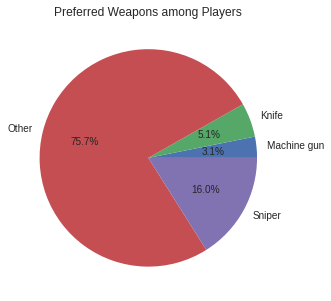

In [191]:
labels = ["Machine gun","Knife","Other","Sniper"]

plt.figure(figsize=(12,5)) 
plt.pie(x,autopct='%.1f%%', labels= labels) 
plt.title("Preferred Weapons among Players") 
plt.show()

Text(0, 0.5, 'Lost Games')

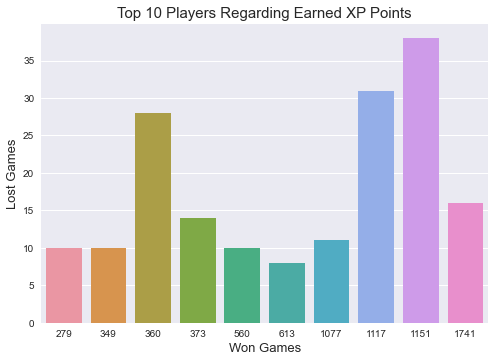

In [6]:
"""
    The below chart shows the top 10 players regarding the earned XP points.
    Numbers of won and lost games are shown.
"""

df = data_df[data_df["xp"] > 5000000].sort_values("kdRatio")[-10:]
sns.barplot(
    x="wins", 
    y="losses",
    #hue="shots",
    data=df)#.set(title = "Top 10 Players Regarding Earned XP Points")
plt.title("Top 10 Players Regarding Earned XP Points", size = 15)
plt.xlabel("Won Games", size = 13); plt.ylabel("Lost Games", size = 13)

Text(0.5, 1.0, 'Hitted Shots vs Missed Shots')

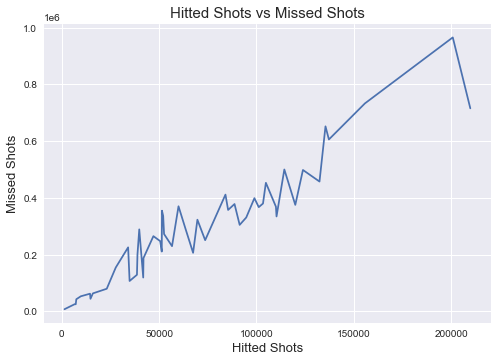

In [7]:
# WHAT TO YOU THINK? IS IT USEFUL?
df = data_df[data_df["level"] > 200].head(50)
sns.lineplot(x = "hits",
            y = "misses",
            data = df)
plt.xlabel("Hitted Shots", size = 13); plt.ylabel("Missed Shots", size = 13); plt.title("Hitted Shots vs Missed Shots", size = 15)